<a href="https://colab.research.google.com/github/creepypers/Classification-diabetiques-avec-SVM/blob/main/Titanic_survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repartition des taches

Weni aristide abdoul averibou (XGBOOST)

Moussa Diogne (Random Forest)

Bah Oumar diogo (DeepLearning)

# Partie Theorique

**L'accuracy** : Est la precision globale de notre modele il se calcule par le rapport :

                      (𝑉𝑃+𝑉𝑁)/(𝑉𝑃+𝐹𝑃+𝑉𝑃+𝑉𝑁)

Parmis toutes nos predictions lesquels sont tombes justes.

**La précision** désigne le taux de
réussite de prédiction positifs de notre modèle. Elle est calculée par le rapport :

                          (𝑉𝑃)/(𝑉𝑃+𝐹𝑃)

Parmi tout ce que le modèle prédit comme positif, la précision indique la part réellement correcte.Plus elle est proche de 1, plus le modèle fait peu d’erreurs de faux positifs.

**Le rappel** désigne le taux de réussite dans la prédiction des cas positifs par rapport au total de cas positifs réels de notre modèle. Il est calculé par le rapport :

                            𝑉𝑃/(𝑉𝑃+𝐹𝑁)

Plus il est proche de 1, plus notre modèle arrive à bien prédire les cas réellement vrais. Parmi tous les cas réellement positifs, le rappel indique combien le modèle en retrouve.Plus il est proche de 1, plus le modèle rate peu de vrais positifs.

**Le score F1** désigne la moyenne harmonique de la précision et du rappel. Il permet de vérifier que notre modèle est précis dans ses prédictions positives et qu’il détecte bien tous les cas positifs réels. Sa formule est :

                          𝐹1 = 2×(𝑃×𝑅/𝑃+𝑅)


## Courbes

**Courbes d’apprentissage** :

Les courbes d’apprentissage montrent l’évolution des performances d’un modèle en fonction de la quantité de données d’entraînement.

Elles comparent généralement l’erreur sur les données d’entraînement et l’erreur sur les données de validation.

Si les deux erreurs sont élevées, le modèle est en sous-apprentissage (underfitting).
Si l’erreur d’entraînement est faible mais celle de validation élevée, le modèle est en sur-apprentissage (overfitting).

**Courbe ROC** :

La courbe ROC mesure la capacité d’un modèle à distinguer les classes positives et négatives.
Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle.

L’aire sous la courbe (AUC) résume la performance globale :
AUC = 1 correspond à un modèle parfait,
AUC = 0.5 correspond à un modèle aléatoire.

**Courbes Précision–Rappel** :

Les courbes précision–rappel montrent le compromis entre la précision et le rappel pour différents seuils.
Plus la courbe est proche du coin supérieur droit, plus le modèle est performant.

**Matrice de Confusion** :

La matrice de confusion est un tableau qui compare les valeurs réelles aux valeurs prédites par le modèle.

Elle contient :
Vrais Positifs (VP) : prédictions positives correctes
Faux Positifs (FP) : prédictions positives incorrectes
Faux Négatifs (FN) : prédictions négatives incorrectes
Vrais Négatifs (VN) : prédictions négatives correctes

**Erreurs de Validation Croisée** :

La validation croisée consiste à diviser les données en plusieurs parties appelées folds.

Le modèle est entraîné plusieurs fois, chaque fois sur une partie des données, tandis que les autres servent à l’évaluation.

L’erreur de validation croisée correspond à la moyenne des erreurs obtenues sur tous les folds.

Elle permet d’évaluer la capacité de généralisation du modèle.

**Erreurs d’Apprentissage** :

Les erreurs d’apprentissage correspondent aux erreurs calculées sur les données d’entraînement et de validation.

Si les deux erreurs sont élevées, le modèle est en sous-apprentissage.
Si l’erreur d’entraînement est faible mais celle de validation élevée, le modèle est en sur-apprentissage.

Un bon modèle présente des erreurs faibles et proches sur les deux ensembles.

## XGBOOST

### Présentation détaillée de l'algorithme XGBoost

XGBoost, qui signifie eXtreme Gradient Boosting, est une bibliothèque open-source devenue une référence incontournable pour traiter les données structurées. Il fait partie de la famille de l'Ensemble Learning. Le principe est de ne pas se reposer sur un seul modèle, mais de combiner plusieurs modèles plus simples appelés apprenants faibles, généralement des arbres de décision peu profonds. En les assemblant séquentiellement, on obtient un modèle global fort. XGBoost est concretement une implémentation optimisée et régularisée de cette méthode. Il est conçu pour être à la fois plus rapide, plus robuste et plus précis.


### Origine : améliorations de Gradient Boosting

L'algorithme tire son origine du Gradient Boosting classique, mais il lui apporte des améliorations majeures pour combler ses lacunes.
Le principe de base (Gradient Boosting) : L'idée est de construire une suite d'arbres les uns après les autres. Chaque nouvel arbre a pour unique but de corriger les erreurs (les résidus) commises par les arbres précédents. C'est une méthode d'amélioration continue.

Les améliorations apportées par XGBoost (Extreme) : XGBoost est considéré comme une version extrême car il pousse ce concept plus loin grâce à trois optimisations principales :

Une meilleure **vision** mathématique : Là où le Gradient Boosting classique utilise une approche simple pour corriger l'erreur, XGBoost utilise une approximation plus fine (dite du second ordre) pour choisir comment diviser les données et attribuer les poids. Cela lui permet d'être plus précis plus vite.

La **régularisation intégrée** : Contrairement aux anciennes versions, XGBoost inclut directement des pénalités pour empêcher les arbres de devenir trop complexes. Cela aide énormément à éviter le sur-apprentissage (overfitting)

**L'optimisation informatique** : C'est une évolution au niveau industrielle, l'algorithme est capable d'utiliser le calcul parallèle (utiliser tous les cœurs du processeur) et gère intelligemment la mémoire. Cela lui permet de traiter des volumes de données beaucoup plus importants et beaucoup plus rapidement que le boosting traditionnel.

### Fonctionnement

Le fonctionnement de XGBoost repose sur trois piliers principaux qui le rendent à la fois précis et rapide.

1. **Arbres de décision** (Apprentissage séquentiel) XGBoost utilise des arbres de décision comme briques de base. Contrairement à une forêt aléatoire qui construit ses arbres indépendamment les uns des autres, XGBoost les construit séquentiellement (les uns après les autres).

**Correction d'erreurs** : Chaque nouvel arbre a pour unique mission de corriger les erreurs commises par l'ensemble des arbres précédents. Il se concentre sur les exemples difficiles que le modèle n'arrive pas encore à bien prédire.

Apprenants faibles sont Individuellement, des arbres peu profonds, C'est leur addition qui crée un modèle global performant.

2. **Régularisation** (Contrôle de la complexité) C'est une des grandes forces de XGBoost par rapport au Gradient Boosting classique. La régularisation est le mécanisme de sécurité intégré pour empêcher le modèle de faire de l'overfitting.

**Pénalités** : L'algorithme ajoute des pénalités mathématiques comme **L1** et **L2** si un arbre devient trop complexe ou si les poids attribués aux feuilles sont trop extrêmes.

**Élagage (Pruning)** : Lors de la construction, si une branche d'un arbre n'apporte pas un gain de performance suffisant par rapport à la complexité qu'elle ajoute, XGBoost la supprime, c'est pour ca on parle d'élagage, permettant de garder le modèle simple et efficace.

3. **Parallélisation** (Vitesse de calcul) Bien que les arbres soient ajoutés l'un après l'autre de façon séquentielle, XGBoost réussit à être extrêmement rapide grâce à la parallélisation à l'intérieur de la construction de chaque arbre.

**Traitement simultané** : Au lieu d'analyser chaque caractéristique (colonne) une par une pour trouver le meilleur point de coupure, XGBoost utilise tous les cœurs du processeur pour analyser toutes les caractéristiques en même temps.

**Optimisation mémoire** : Il utilise des structures de données optimisées (comme des blocs compressés) et gère intelligemment la mémoire cache de l'ordinateur pour traiter de très grands volumes de données sans ralentir.




### Hyperparamètres clés et leur influence



Nous pouvons les classer en deux catégories : ceux qui gèrent la stratégie d'apprentissage et ceux qui contrôlent la complexité du modèle pour éviter le sur-apprentissage (overfitting).

**Stratégie d'apprentissage (Vitesse et Précision)**

**n_estimators (Nombre d'arbres)**

C'est le nombre total d'arbres que l'algorithme va construire de facon séquentielle.

**Influence** : plus il y a d'arbres, plus le modèle a de chances de corriger ses erreurs et d'affiner ses prédictions.

**Risque** : Un nombre trop élevé augmente le temps de calcul et le risque de sur-apprentissage (le modèle apprend le bruit des données). Il fonctionne en tandem avec le learning rate.

**learning_rate ou eta (Vitesse d'apprentissage)**

C'est un coefficient (souvent entre 0.01 et 0.3) qui réduit l'impact de chaque nouvel arbre ajouté.

**Influence** : une valeur faible (ex: 0.01) rend l'apprentissage plus lent et progressif. Il faut alors beaucoup d'arbres (n_estimators élevé), mais le résultat est souvent plus robuste et généralise mieux.

Une valeur élevée (ex: 0.3) permet d'apprendre vite avec moins d'arbres, mais on risque de manquer l'optimum ou de sur-apprendre.

**Contrôle de la complexité (Anti-Surapprentissage)**
Ces paramètres servent de freins pour empêcher le modèle de devenir trop complexe.

**max_depth (Profondeur maximale)**

C'est la hauteur maximale autorisée pour chaque arbre.

**Influence** : des arbres profonds peuvent capturer des relations très complexes, mais risquent d'apprendre des détails anecdotiques (bruit).

Des arbres peu profonds (3 à 10 niveaux) capturent les tendances principales et sont plus sûrs pour éviter le sur-apprentissage.

**min_child_weight**

C'est la quantité minimale d'exemples (ou somme de poids) nécessaire dans une feuille pour qu'on accepte de la créer.

**Influence** : c'est un paramètre conservateur. Si une règle spécifique ne concerne que très peu de passagers (ex: 1 ou 2), ce seuil empêchera la création d'une feuille pour eux, forçant le modèle à rester plus général.

**gamma (min_split_loss)**

C'est le gain de performance minimal exigé pour autoriser une nouvelle division (split) dans l'arbre.

**Influence** : Si diviser un groupe en deux n'améliore pas le modèle d'au moins la valeur gamma, XGBoost ne le fait pas. Cela agit comme un "élagage" automatique pendant la construction de l'arbre.

**reg_alpha (L1) et reg_lambda (L2)**

Ce sont des pénalités mathématiques ajoutées à l'erreur du modèle.

**Influence**

$Alpha$ ($L1$) : Pousse les poids des variables inutiles vers zéro (sélection de variables). Utile si vous avez beaucoup de colonnes dont certaines ne servent à rien.

$Lambda$ ($L2$) : Empêche les poids de devenir trop grands, ce qui rend le modèle plus stable face aux petites variations des données.

### Avantages par rapport aux autres approches de boosting et utilisation

**Avantages**
XGBoost se distingue des implémentations classiques de boosting (comme le standard GBM) par plusieurs avantages qui en font souvent qu'il est priorisé :

**Vitesse et Parallélisation** : Contrairement au boosting classique qui est souvent lent car séquentiel, XGBoost est conçu pour utiliser toute la puissance de la machine. Il parallélise la construction des arbres (au niveau des nœuds), ce qui le rend beaucoup plus rapide à entraîner, même sur de grands jeux de données.

**Régularisation intégrée** : C'est son grand avantage sur le Gradient Boosting standard. Grâce aux paramètres de régularisation (L1 et L2) intégrés dans sa fonction objectif, XGBoost résiste beaucoup mieux au sur-apprentissage (overfitting). Il est plus "prudent" et généralise souvent mieux.

**Gestion des données manquantes** : XGBoost est capable de gérer nativement les valeurs manquantes (NaN). Lors de l'entraînement, il apprend automatiquement quelle direction (gauche ou droite) prendre dans l'arbre lorsqu'une donnée est absente, évitant ainsi des étapes lourdes de nettoyage manuel.

**Élagage intelligent (Tree Pruning)** : Alors que le boosting classique arrête souvent de diviser un nœud lorsqu'il atteint un gain négatif, XGBoost construit l'arbre jusqu'à sa profondeur max puis élague à rebours les branches inutiles. Cela permet de trouver des interactions profondes que d'autres méthodes auraient manquées prématurément.

**Utilisation**
On privilégie XGBoost lorsqu'on a :  

**Données tabulaires** (structurées) : C'est le domaine d'excellence de XGBoost. Pour tout ce qui ressemble à des données Excel ou SQL, il est souvent plus performant que le Deep Learning.

**Compétitions et Industrie** : Il est le standard pour les compétitions de type Kaggle et très utilisé en entreprise pour la détection de fraude, le risque de crédit ou la prédiction de comportement client (churn), car il offre un excellent compromis entre précision et vitesse d'exécution.

**Classification et Régression** : Il est très flexible et s'adapte aussi bien à la prédiction d'une classe (survie ou non) qu'à la prédiction d'une valeur numérique (prix d'un billet).





### SOURCES


https://blent.ai/blog/a/xgboost-tout-comprendre

https://www.jedha.co/formation-ia/algorithme-xgboost

https://xgboost.readthedocs.io/en/release_0.72/parameter.html

## Apprentissage Profond

### Fonctionnement


L’apprentissage profond consiste à fournir à l’algorithme un ensemble de données et à laisser la machine apprendre automatiquement les corrélations entre ces données. Il s’appuie sur plusieurs couches de neurones qui, en modifiant progressivement différents paramètres (poids et biais), cherchent à minimiser l’erreur entre la prédiction et la valeur réelle grâce au mécanisme de rétropropagation.

La couche d’entrée reçoit les données brutes (par exemple les pixels d’une image, les mots d’un texte ou les valeurs d’un tableau) transformées en valeurs numeriques.
Les couches cachées transforment ces données à travers une série d’opérations non linéaires pour extraire des caractéristiques de plus en plus pertinentes.
Enfin, la couche de sortie produit le résultat final (une classe, une valeur prédite ou une probabilité) .

### Architecture

**Reseaux denses** :
Ce sont des réseaux où chaque neurone d’une couche est connecté à tous les neurones de la couche suivante. Ils apprennent uniquement à partir de données déjà représentées sous forme de vecteurs numériques.

**Cas d'utilisation** : il est adapte pour les taches simples de classifiation ou de regression

**Reseaux Convolutifs** :
Ils sont capables d’extraire automatiquement des caractéristiques d'un element(bords, textures, motifs). Ils sont très efficaces pour capturer les structures spatiales.
**Cas d'utilisation** :
Tres efficaces pour les donnees sous forme de grilles (Images, videos)

**Reseaux Recurrents** :
Ils peuvent garder en mémoire l’information des étapes précédentes.

**Cas d'utilisation** :
les données séquentielles comme le texte, l’audio ou les donnees temporelles

### HypersParametres clefs et influences

**Le learning rate (Taux d'apprentissage)** : détermine à quelle vitesse le modèle ajuste ses poids : s’il est trop élevé, l’apprentissage devient instable, et s’il est trop faible, le modèle apprend très lentement.

**Le nombre de couches et de neurones** influence la complexité du réseau : un modèle trop petit n’apprend pas assez, tandis qu’un modèle trop grand risque de mémoriser les données au lieu de généraliser.

**La taille du batch (Batch size)** : c'est nombre d’échantillons traités avant chaque mise à jour des poids. Il joue aussi un rôle important : un petit batch peut rendre l’apprentissage plus bruité mais souvent plus efficace, alors qu’un grand batch stabilise l’entraînement mais peut réduire la capacité de généralisation.

**Le nombre d’époques (epochs)** : correspond au nombre de fois où le modèle parcourt l’ensemble des données ; trop peu mène au sous-apprentissage, trop peut créer du surapprentissage.

**Les fonctions d’activation :** (Sigmoid, etc...) permettent au réseau d’apprendre des relations non linéaires.

**Optimiseur** (SGD, Adam, RMSProp) : influence la manière dont les poids sont mis à jour

**Dropout / régularisation :** techniques qui empêchent le modèle de surapprendre en le forçant à ne pas dépendre trop fortement de certains neurones.

### Avantages et utilisations


L'apprentissage profond a l’avantage d’apprendre automatiquement les caractéristiques importantes des données, sans intervention humaine. Il est très performant pour traiter des informations complexes comme les images, le texte ou le son, et il s’adapte facilement à différents types de problèmes.

Il est utilisé en vision par ordinateur (reconnaissance d’images, détection d’objets), dans le traitement du langage (traduction, assistants virtuels), en finance (détection de fraude, prévision).

### SOURCES



https://www.youtube.com/watch?v=TdLa5h-x2nA
https://www.youtube.com/watch?v=trWrEWfhTVg
https://www.youtube.com/watch?v=XUFLq6dKQok

# Partie pratique XGBOOST

## Import des donnees

In [ ]:
import pandas as pd

donnees_apprentissage = pd.read_csv('/titanic/train.csv')

donnees_test = pd.read_csv('/titanic/test.csv')

gabarit_soumission = pd.read_csv('/titanic/gender_submission.csv')

display(donnees_apprentissage.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Calcul des statistiques descriptives

In [ ]:
print("Statistiques des variables numériques sur les donnees d'apprentissage")
display(donnees_apprentissage.describe())

print("Statistiques des variables textuelles ou catégorielles ")
display(donnees_apprentissage.describe(include=['O']))

Statistiques des variables numériques sur les donnees d'apprentissage


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Statistiques des variables textuelles ou catégorielles 


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## creons des histogrammes pour visualiser la distribution des valeurs de chaque caracteristique

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


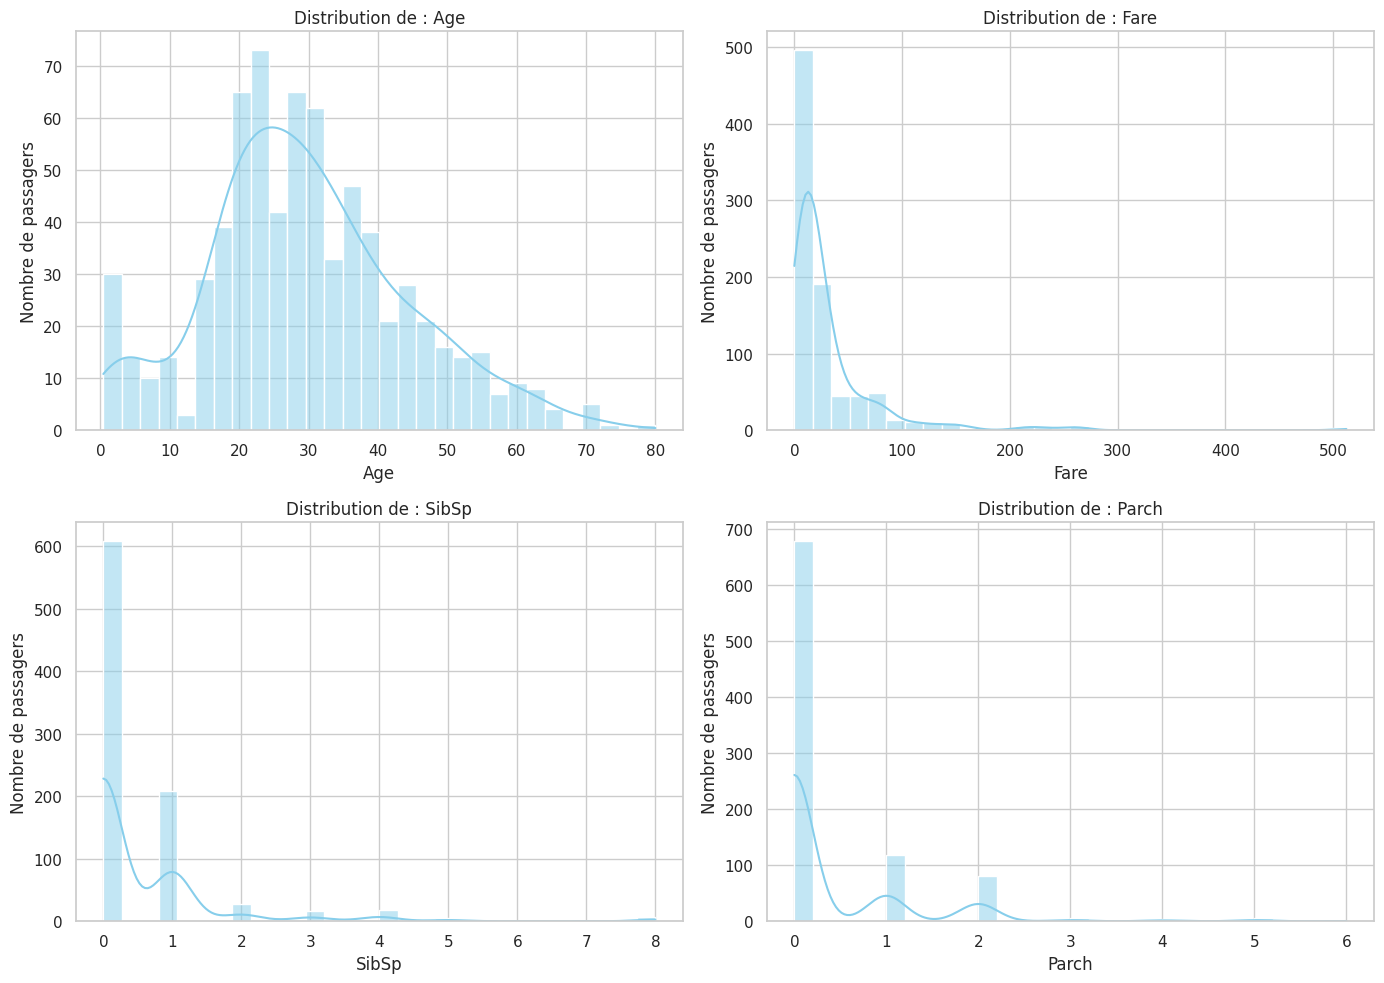

In [ ]:
#pour le style
sns.set(style="whitegrid")

# Définissons les variables a visualiser
variablesatracer = ['Age', 'Fare', 'SibSp', 'Parch']

# Creons une figure avec 4 graphiques de 2 lignes et 2 colones.
plt.figure(figsize=(14, 10))

for i, variable in enumerate(variablesatracer):
    plt.subplot(2, 2, i + 1) # Position du graphique

    # Création de l'histogramme
    sns.histplot(donnees_apprentissage[variable].dropna(), kde=True, bins=30, color='skyblue')
    # .dropna() est mis pour ignorer les valeurs manquantes NaN dans 'Age'

    plt.title(f'Distribution de : {variable}')
    plt.xlabel(variable)
    plt.ylabel('Nombre de passagers')

# Ajustement automatique de l'espacement
plt.tight_layout()
plt.show()

 ## diagrammes de dispersion pour explorer les relations entre les caractéristiques et étudier la matrice de corrélation

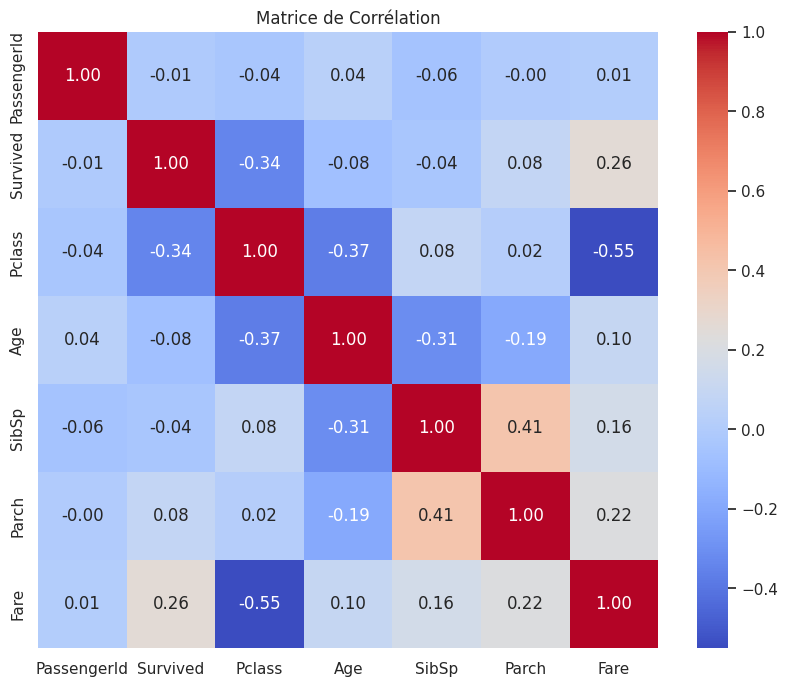

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de corrélation
colonnes_numeriques = donnees_apprentissage.select_dtypes(include=['number'])
matrice_corr = colonnes_numeriques.corr()

# Affichage de la Heatmap (Carte de chaleur)
plt.figure(figsize=(10, 8))
# annot=True affiche les chiffres, cmap='coolwarm' met en rouge les fortes corrélations
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


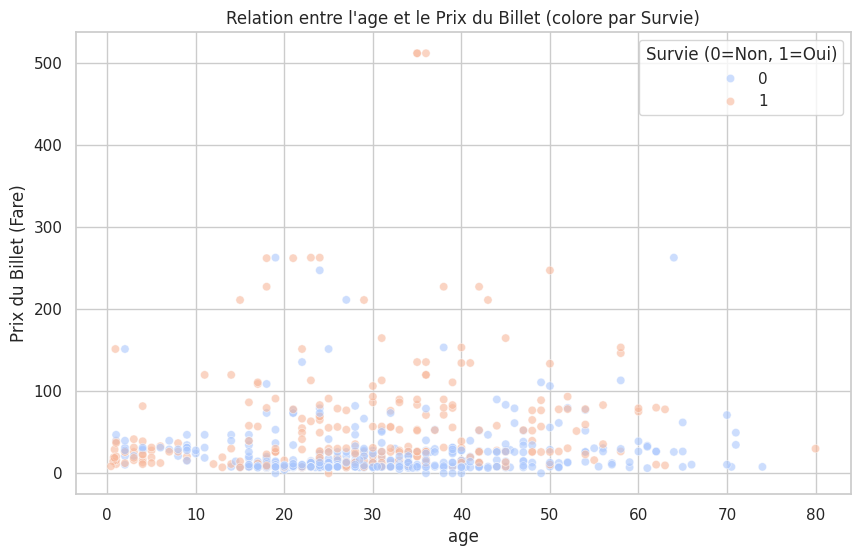

In [ ]:
# Diagramme de dispersion (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=donnees_apprentissage, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.6)

plt.title("Relation entre l'age et le Prix du Billet (colore par Survie)")
plt.xlabel("age")
plt.ylabel("Prix du Billet (Fare)")
plt.legend(title='Survie (0=Non, 1=Oui)')
plt.show()

### Etude des corrlations



sur le diagramme de correlation on observe que y a une correlation positive de 0.26 avec le prix du biellet et la survie. Ceux qui avaient des biellets plus cheres ont eut plus de chances de survie. ensuite on observe un correlation negative entre la classe Pclass et la survie. ce qui montre que ceux qui etait dans les classe dont le numero est plus bas comme classe 1 avaient plus de chances d'etres sauves.

### Identifions les classes de l'ensemble de données, verifiant si elles sont équilibrées ou pas.



Répartition des classes 
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


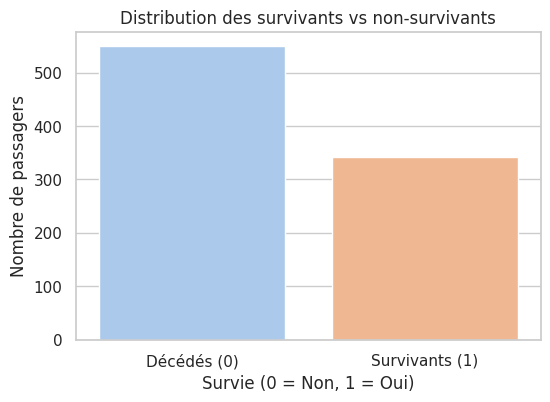

In [ ]:
# Calcul des pourcentages exacts
# normalize=True permet d'obtenir la proportion (entre 0 et 1) au lieu du nombre brut
repartition = donnees_apprentissage['Survived'].value_counts(normalize=True) * 100

print("Répartition des classes ")
print(repartition)

# Visualisation graphique
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=donnees_apprentissage, hue='Survived', palette='pastel', legend=False)

plt.title("Distribution des survivants vs non-survivants")
plt.xlabel("Survie (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de passagers")
# On change les étiquettes 0 et 1 pour que ce soit plus comprehensible
plt.xticks([0, 1], ['Décédés (0)', 'Survivants (1)'])

plt.show()

### Gestion des valeurs manquantes


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Identification des valeurs manquantes
print("Valeurs manquantes dans les donnees d'apprentissage")
print(donnees_apprentissage.isnull().sum())

# Creons une copie pour travailler sans modifier l'original
# donnees_nettoyees servira pour l'entraînement du modèle
donnees_nettoyees = donnees_apprentissage.copy()

Valeurs manquantes dans les donnees d'apprentissage
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Traitement des valeurs manquantes

# On a beaucoup de donnees manquantes pour l'age donc on va remplacer par la mediane
mediane_age = donnees_nettoyees['Age'].median()
donnees_nettoyees['Age'] = donnees_nettoyees['Age'].fillna(mediane_age)

# Pour l'embarquement il manque 2 valeurs, on remplace par la valeur la plus fréquente on va utiliser donc le Mode
mode_embarquement = donnees_nettoyees['Embarked'].mode()[0]
donnees_nettoyees['Embarked'] = donnees_nettoyees['Embarked'].fillna(mode_embarquement)

# Pour la Cabine il manque plus de 77/100 des données, c'est beaucoup de donnees manquantes. on laisse tomber cette collonne parce qu'on peut pas avoir des donnees fiales pour ca
donnees_nettoyees = donnees_nettoyees.drop('Cabin', axis=1)

# Suppression des identifiants inutiles pour la prédiction
donnees_nettoyees = donnees_nettoyees.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
#numerisons les variables textuelles en chiffres
encodeur = LabelEncoder()

# 0 ou 1 pour male et femelle
donnees_nettoyees['Sex'] = encodeur.fit_transform(donnees_nettoyees['Sex'])

# 0 pour S, 1 pour C, 2 pour Q
donnees_nettoyees['Embarked'] = encodeur.fit_transform(donnees_nettoyees['Embarked'])



In [ ]:
# verifions nos donnees
print("\n valeurs manquantes apres nettoyage ")
print(donnees_nettoyees.isnull().sum())

print("\n aperçu des données prêtes")
display(donnees_nettoyees.head())


 valeurs manquantes apres nettoyage 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

 aperçu des données prêtes


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## $apprentissage$ $avec$ $XGBoost$

### creaion du modele

avant de creer le modele separons nos donnees pour en mettant les caracteristiques dans x et le resultat dans y
ensuite separons le en donnee de test et d'entrainement  

In [ ]:
# X contient toutes les caracteristiques commes l'age, Sexe, Prix, ...
X = donnees_nettoyees.drop('Survived', axis=1)

# y contient la réponse
y = donnees_nettoyees['Survived']



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Création d'un jeu de validation
# On garde 20% des données pour cette vérification.
X_entrainement, X_validation, y_entrainement, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Creons maintenant le modele

In [ ]:
# Instanciation du modèle XGBoost

modele_xgb = XGBClassifier(
    n_estimators=100,       # Nombre d'arbres de départ
    learning_rate=0.1,      # Vitesse d'apprentissage
    eval_metric='logloss',  # Métrique d'erreur (Log-Loss)
    random_state=42         # Pour avoir toujours le même résultat
)

In [ ]:
# Définissons d'abord la Grille d'hyperparamètres à tester
parametres_a_tester = {
    'n_estimators': [50, 100, 200],      # Nombre d'arbres
    'learning_rate': [0.01, 0.1, 0.2],   # Vitesse d'apprentissage
    'max_depth': [3, 4, 5],              # Profondeur des arbres
    'subsample': [0.8, 1.0]              # Portion de données utilisée
}

In [ ]:
# la stratégie K-Fold pour la Validation Croisée
strategie_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Configuration de l'entraînement intelligent (GridSearch)
recherche_grid = GridSearchCV(
    estimator=modele_xgb,           # Notre modèle vide
    param_grid=parametres_a_tester, # Les options à tester
    scoring='accuracy',             # Objectif : avoir le plus de réponses justes
    cv=strategie_kfold,             # Utilisation du K-Fold
    n_jobs=-1,                      # Utilise toute la puissance du PC
    verbose=1                       # Affiche la progression
)

In [ ]:
# commencons l'entrainement
print("commencons l'entrainement")
recherche_grid.fit(X_entrainement, y_entrainement)

commencons l'entrainement
Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

### voyons les rsultats

In [ ]:
# resultats trouves

print(f"Meilleurs paramètres trouvés : {recherche_grid.best_params_}")
print(f"Meilleure exactitude (Accuracy) moyenne : {recherche_grid.best_score_:.4f}")

Meilleurs paramètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Meilleure exactitude (Accuracy) moyenne : 0.8273


In [ ]:
# sauvegardons le meilleur modèle dans une variable
meilleur_modele = recherche_grid.best_estimator_

## Verifions les resultats et interpretons

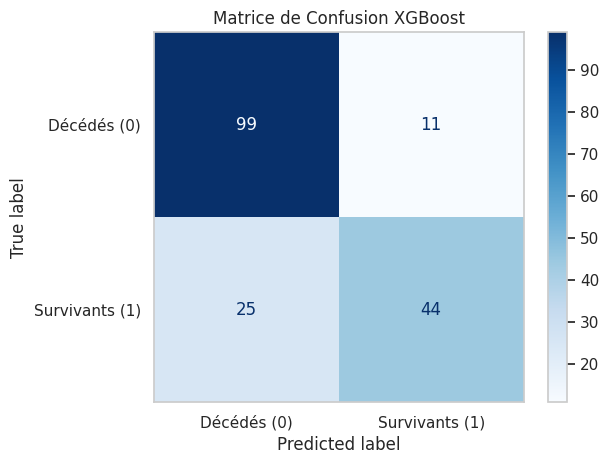

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = meilleur_modele.predict(X_validation)

# Calcul de la matrice
# comparation des Vraies réponses y_validation aux Prédictions y_pred
matrice = confusion_matrix(y_validation, y_pred)

# Affichage graphique
disp = ConfusionMatrixDisplay(confusion_matrix=matrice, display_labels=["Décédés (0)", "Survivants (1)"])
disp.plot(cmap='Blues')

plt.title("Matrice de Confusion XGBoost")
plt.grid(False) # On enlève le quadrillage pour que ce soit plus joli
plt.show()

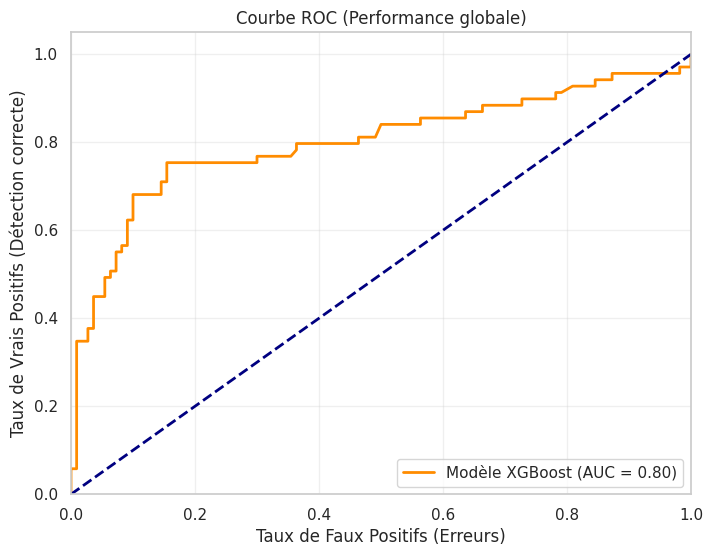

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des probabilités
# Pour la courbe ROC, on a besoin de la probabilité d'être survivant (pas juste 0 ou 1)
# [:, 1] signifie qu'on prend la probabilité de la classe 1 (Survivant)
probs_survie = meilleur_modele.predict_proba(X_validation)[:, 1]

# Calcul des métriques ROC
fpr, tpr, thresholds = roc_curve(y_validation, probs_survie)
roc_auc = auc(fpr, tpr) # Calcul de l'aire sous la courbe (La note sur 1)

# Tracé du graphique
plt.figure(figsize=(8, 6))

# La courbe du modèle (en orange)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Modèle XGBoost (AUC = {roc_auc:.2f})')

# La ligne du hasard (en bleu pointillé) - correspond à pile ou face
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Mise en page
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (Erreurs)')
plt.ylabel('Taux de Vrais Positifs (Détection correcte)')
plt.title('Courbe ROC (Performance globale)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

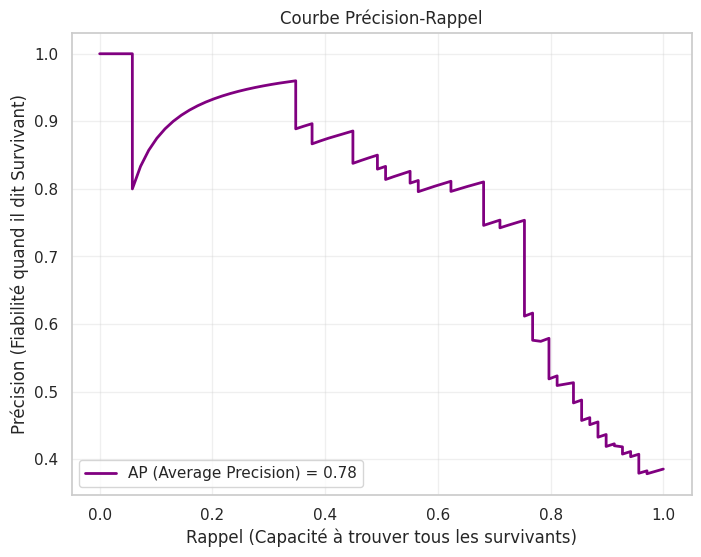

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calcul des scores
precision, recall, _ = precision_recall_curve(y_validation, probs_survie)
avg_precision = average_precision_score(y_validation, probs_survie)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP (Average Precision) = {avg_precision:.2f}')

# Mise en page
plt.xlabel('Rappel (Capacité à trouver tous les survivants)')
plt.ylabel('Précision (Fiabilité quand il dit Survivant)')
plt.title('Courbe Précision-Rappel')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

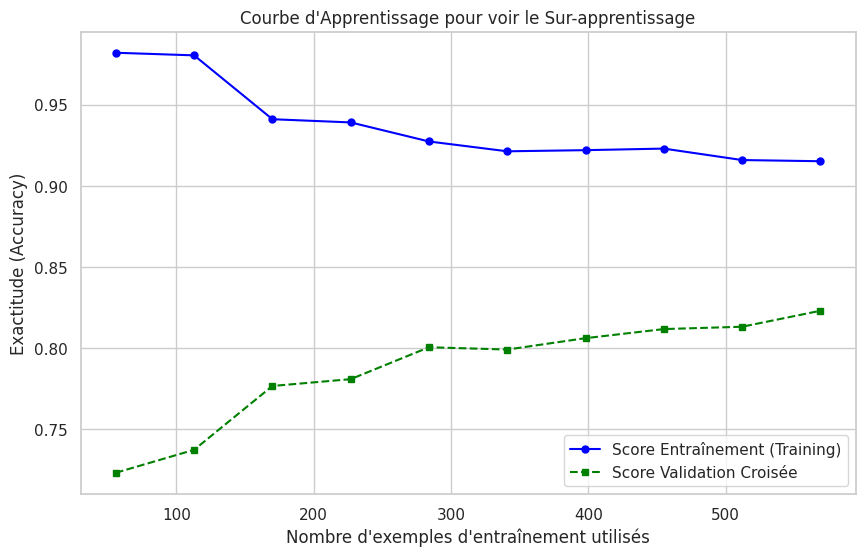

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calcul des performances pour différentes tailles de jeu d'entraînement
# Cela permet de voir les erreurs d'apprentissage contre les erreurs de validation croisée
train_sizes, train_scores, test_scores = learning_curve(
    estimator=meilleur_modele,
    X=X_entrainement,
    y=y_entrainement,
    cv=5,                # 5 validations croisées à chaque étape
    n_jobs=-1,           # Utilise tous les coeurs
    train_sizes=np.linspace(0.1, 1.0, 10), # On teste de 10% à 100% des données
    scoring='accuracy'
)

# Calcul des moyennes et écarts-types (pour lisser les courbes)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))

# Courbe d'entraînement
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Score Entraînement (Training)')

# Courbe de validation : erreurs de validations croisé
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Score Validation Croisée')

plt.title("Courbe d'Apprentissage pour voir le Sur-apprentissage")
plt.xlabel("Nombre d'exemples d'entraînement utilisés")
plt.ylabel("Exactitude (Accuracy)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### matrice de confusion
sur la matrice de confusion on a un resultat de 143 predictions sur 179, on peut dire que le modele est pas mal performant. Mais aussi on a deux fois plus de faux negatifs que de faux positifs ( 25 et 11). donc il prédit la mort pour des personnes qui ont en réalité survécu, alors qu'il se trompe rarement quand il prédit un décès.
### Sur la courbe ROC
on a un score de 0.8, le modele est performant comme avec la matrice. La courbe progresse vite dans vers le haut au debut, ce qui montre qu'il detecte bien les survivants par les vrais positifs, aussi on a un taux d'erreur bas. ce modele est fiable vu qu'il est different du hasard, c'est t'a dire un score > a 0.5.
### courbe des precisions rappel
cette courbe est iportante vu que nos classes sont déséquilibrées par ce qu'on plus de décès. On a un score moyen de 0.78 qui est solide. Le graphique montre que le modèle est très fiable lorsqu'il est sûr de lui sur la partie gauche. par contre a droite on remarque la precision chutte rapidement. Ce qui montre qu'il repère très bien les cas évidents mais a plus de mal à identifier les survivants avec un profil un peu different.
### courbe d'apprentissage
La courbe de validation est en croissance constante montrant que le modele generalise bien avec l'ajout de données. il y a un ecart assez grand entre les deux courbes laissant croire que le modele surapprends avec les donnees d'entrainement.

## SOURCE POUR LA PRATIQUE

https://www.digitalocean.com/community/tutorials/how-to-build-a-machine-learning-classifier-in-python-with-scikit-learn

https://www.tensorflow.org/tutorials?hl=fr

Gemini pour les erreurs et plus de compréhension du code (AZIZ)

# Partie Pratique Apprentissage Profonde

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/titanic/train.csv')

## Presentation et Preprocessing

### Presentation

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(f"Le Nombre de lignes et de colonnes : {df.shape}")

Le Nombre de lignes et de colonnes : (891, 12)


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/tmp/ipython-input-2891500883.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')
/tmp/ipython-input-2891500883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='viridis')


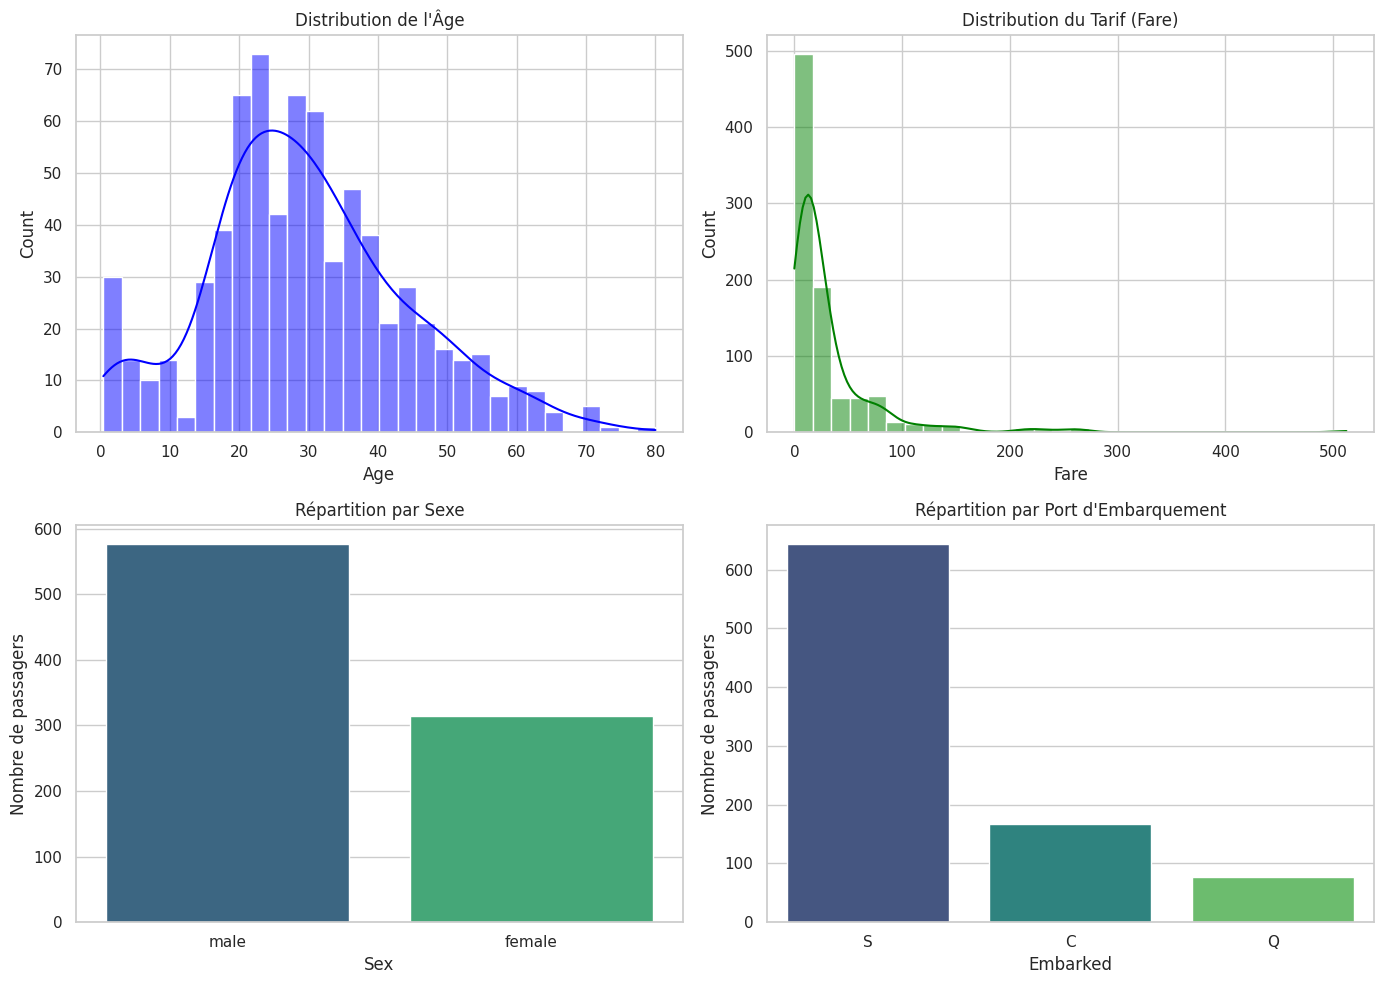

In [ ]:
plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution de l\'Âge')


plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=30, color='green')
plt.title('Distribution du Tarif (Fare)')


plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Répartition par Sexe')
plt.ylabel('Nombre de passagers')


plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.title('Répartition par Port d\'Embarquement')
plt.ylabel('Nombre de passagers')

plt.tight_layout()
plt.show()

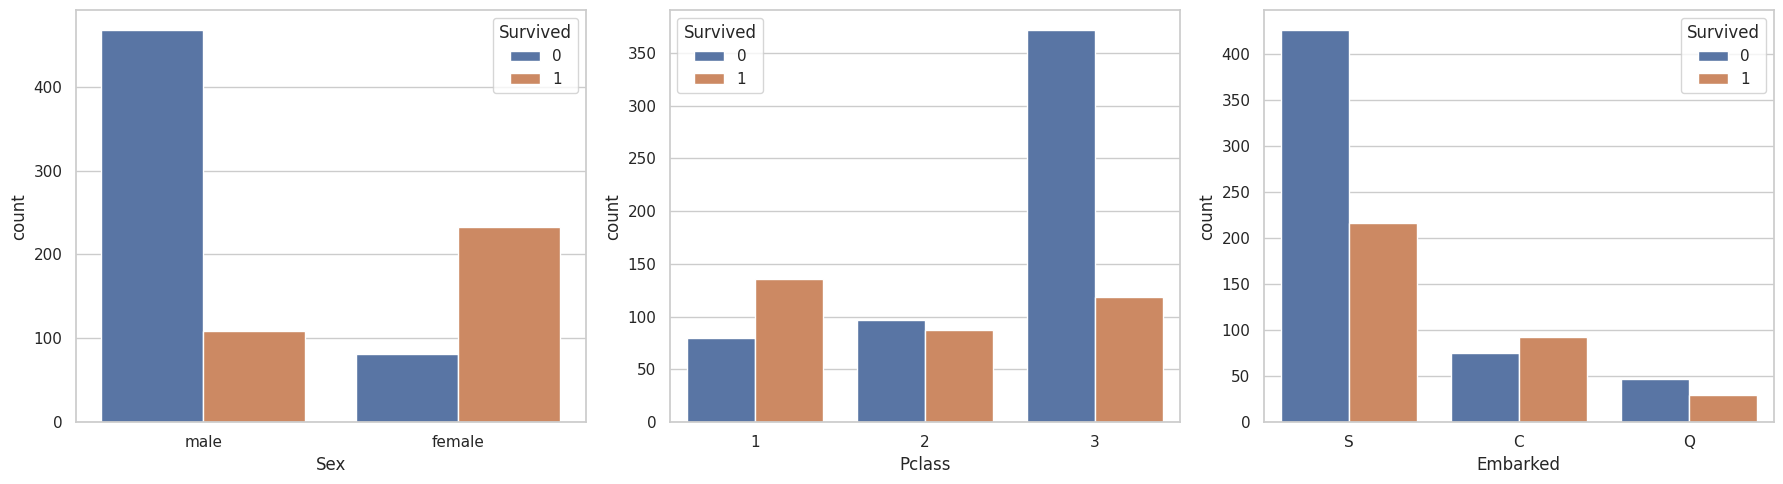

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x="Sex", hue="Survived", ax=axes[0])
sns.countplot(data=df, x="Pclass", hue="Survived", ax=axes[1])
sns.countplot(data=df, x="Embarked", hue="Survived", ax=axes[2])

plt.tight_layout()
plt.show()


Les femmes ont plus de chances de survie que les hommes, la classe compte aussi beaucoup (Les riches ont plus survecu)

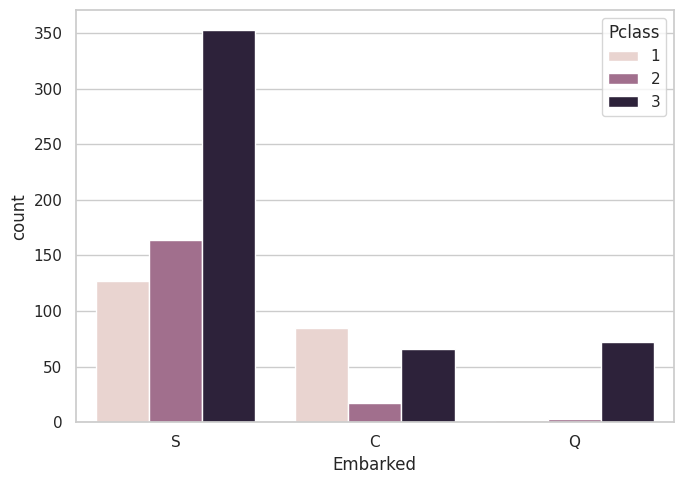

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

sns.countplot(data=df, x="Embarked", hue="Pclass", ax=ax)

plt.tight_layout()
plt.show()


On a un taux superieur de survie pour les gens qui ont embarque en c parcequ'ils sont majoritairement riche

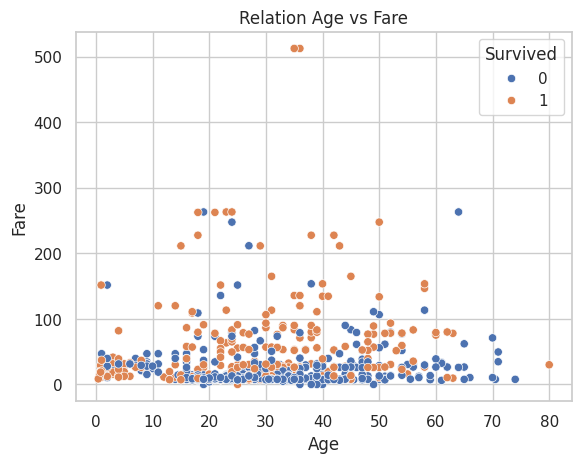

In [ ]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Relation Age vs Fare')
plt.show()


Plus ton billet est chere plus tu as des chances de survie

/tmp/ipython-input-1969754852.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_analyse.pivot_table(


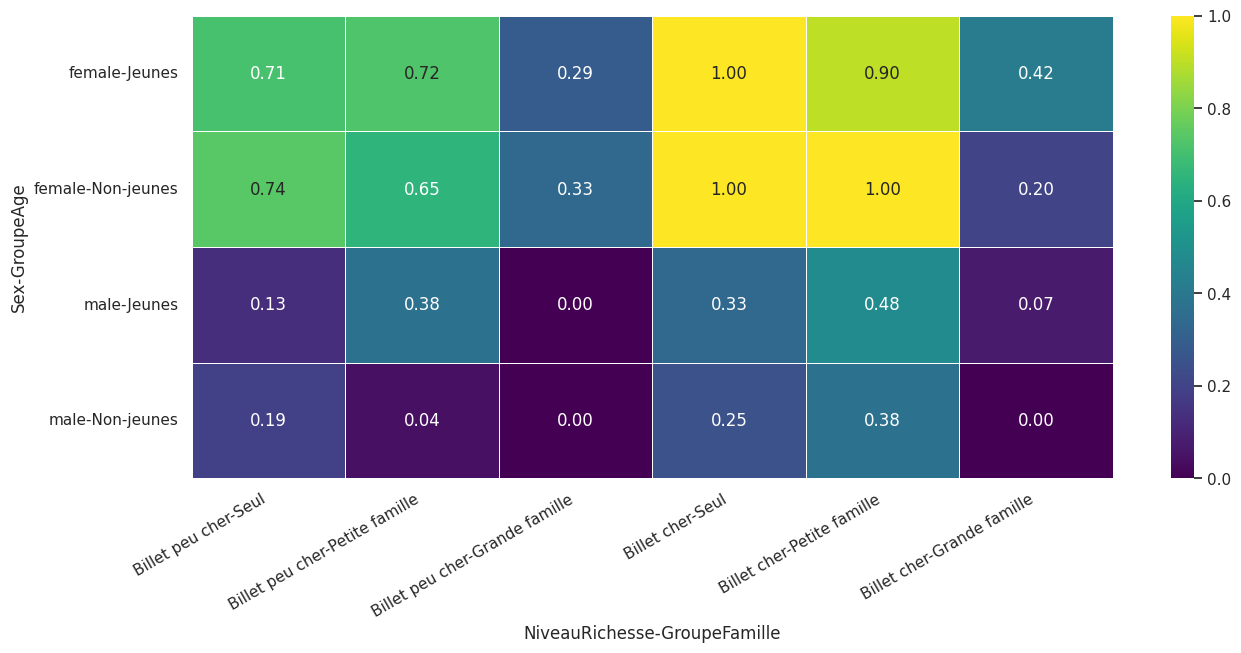

In [ ]:
df_analyse = df.copy()

df_analyse["GroupeAge"] = pd.cut(
    df_analyse["Age"],
    bins=[0, 30, 80],
    labels=["Jeunes", "Non-jeunes"]
)

df_analyse["FamilySize"] = df_analyse["SibSp"] + df_analyse["Parch"] + 1

df_analyse["GroupeFamille"] = pd.cut(
    df_analyse["FamilySize"],
    bins=[0, 1, 4, 11],
    labels=["Seul", "Petite famille", "Grande famille"]
)

df_analyse["NiveauRichesse"] = pd.cut(
    df_analyse["Fare"],
    bins=[-1, df["Fare"].quantile(0.75), df["Fare"].max()],
    labels=["Billet peu cher", "Billet cher"]
)

pivot = df_analyse.pivot_table(
    values="Survived",
    index=["Sex", "GroupeAge"],
    columns=["NiveauRichesse", "GroupeFamille"],
    aggfunc="mean"
)

plt.figure(figsize=(14, 7))

ax = sns.heatmap(
    pivot,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    ha="right"
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)

plt.tight_layout(pad=2)
plt.show()


ceux qui ont survecu le plus ceslt les vieilles et jeunes femmes riches venu seul et les vieilles femmes riches ayant une petite famille une petite famille

/tmp/ipython-input-629533109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=df, palette='pastel')


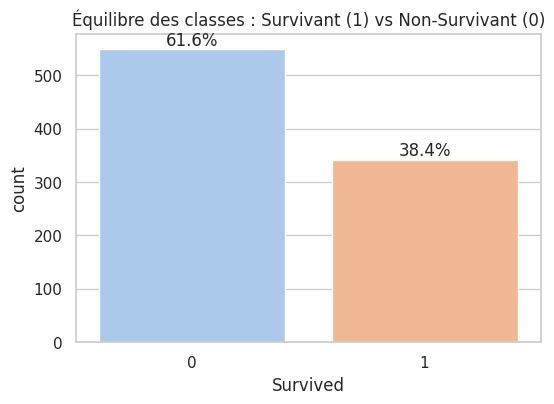

In [ ]:

class_counts = df['Survived'].value_counts(normalize=True) * 100


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survived', data=df, palette='pastel')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Équilibre des classes : Survivant (1) vs Non-Survivant (0)')
plt.show()

On a des classes plus ou moins desiquilibre

### Nettoyage

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


ces colonnes sont inutiles pour notre modele car trop de donnees manquent ou ne servent a rien

In [ ]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


On nettoe les colonnes vides par la medianne et l'endroit d'embarquement

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


Maintenant on vas transformer le sexe et embarked en valeurs numeriques

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

on transforme embarked en valeurs numeriques mais pour eviter une correlation forte on supprime une colonne vu que les donnees sont en 0 et 1 si les 2 conlonnes presentes sont a 0 cest forcement la colonne supprime

In [ ]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

On normalise age et fare car leurs donnees numeriques sont trop grandes et en dl ca risque d'ecraser dans la prediction d'autres donnees tels que le sexe(entre 0 et 1) et donc fausser nos predictions

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,True
1,1,1,1,0.663861,1,0,0.786845,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,True
3,1,1,1,0.433312,1,0,0.420730,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,True


## Preparation a la prediction

In [ ]:


df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
X = df.drop('Survived', axis=1).values
y = df['Survived'].values
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,0,1
1,1,1,1,0.663861,1,0,0.786845,0,0
2,1,3,1,-0.258337,0,0,-0.488854,0,1
3,1,1,1,0.433312,1,0,0.420730,0,1
4,0,3,0,0.433312,0,0,-0.486337,0,1


## Construction du modele

In [ ]:
def construire_modele(input_dim, neurons1=64, neurons2=32, dropout=0.3, lr=0.001):
    model = Sequential()
    model.add(Dense(neurons1, activation='relu', input_dim=input_dim))
    model.add(Dropout(dropout))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


## Validation croisée K-Fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []



for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = construire_modele(X.shape[1])

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    scores.append({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    })

pd.DataFrame(scores).mean()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,0
accuracy,0.815950
precision,0.821231
recall,0.661771
f1,0.731967


## GridSearch

In [ ]:

learning_rates = [0.001, 0.0005]
batch_sizes = [16, 32]
neurons = [(64, 32), (128, 64)]
dropouts = [0.2, 0.3]


best_score = 0
best_params = {}

for lr in learning_rates:
    for batch in batch_sizes:
        for n1, n2 in neurons:
            for d in dropouts:
                model = construire_modele(
                    X.shape[1],
                    neurons1=n1,
                    neurons2=n2,
                    dropout=d,
                    lr=lr
                )

                history = model.fit(
                    X, y,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=batch,
                    verbose=0
                )

                score = max(history.history['val_accuracy'])

                if score > best_score:
                    best_score = score
                    best_params = {
                        "learning_rate": lr,
                        "batch_size": batch,
                        "neurons": (n1, n2),
                        "dropout": d
                    }
best_params, best_score


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


({'learning_rate': 0.001,
  'batch_size': 16,
  'neurons': (128, 64),
  'dropout': 0.2},
 0.8938547372817993)

## Entrainement du modele

In [ ]:
model_final = construire_modele(
    input_dim=X.shape[1],
    neurons1=best_params["neurons"][0],
    neurons2=best_params["neurons"][1],
    dropout=best_params["dropout"],
    lr=best_params["learning_rate"]
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_final.fit(
    X, y,
    validation_split=0.2,
    epochs=50,
    batch_size=best_params["batch_size"],
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5674 - loss: 0.6672 - val_accuracy: 0.7430 - val_loss: 0.5329
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5591 - val_accuracy: 0.8268 - val_loss: 0.4352
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.4935 - val_accuracy: 0.8268 - val_loss: 0.4118
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8010 - loss: 0.4580 - val_accuracy: 0.8547 - val_loss: 0.3715
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.4411 - val_accuracy: 0.8436 - val_loss: 0.3734
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.4383 - val_accuracy: 0.8547 - val_loss: 0.3602
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.4512 - val_accuracy: 0.8492 - val_loss: 0.3580
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 0.4419 - val_accuracy: 0.8715 - val_loss:

In [ ]:
y_pred = (model_final.predict(X) > 0.5).astype(int)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ici vu que la fonction d'activation de notre couche de sortie est une sigmoid on doit fournir un seuil pour la classification  (ici 50%)

## Evaluation du modele

In [ ]:

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))
print(accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       549
           1       0.89      0.68      0.77       342

    accuracy                           0.84       891
   macro avg       0.86      0.81      0.82       891
weighted avg       0.85      0.84      0.84       891

[[520  29]
 [111 231]]
0.8428731762065096


Le taux de faux positif est eleve mais notre modele performe assez bien



28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


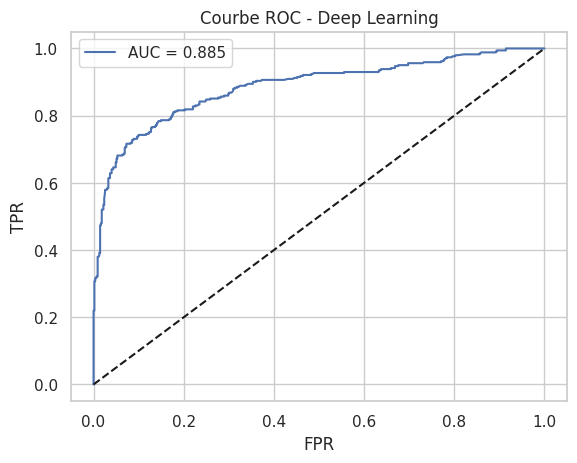

In [ ]:

y_prob = model_final.predict(X).ravel()
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Courbe ROC - Deep Learning")
plt.legend()
plt.show()


On a un modele vraiment efficace

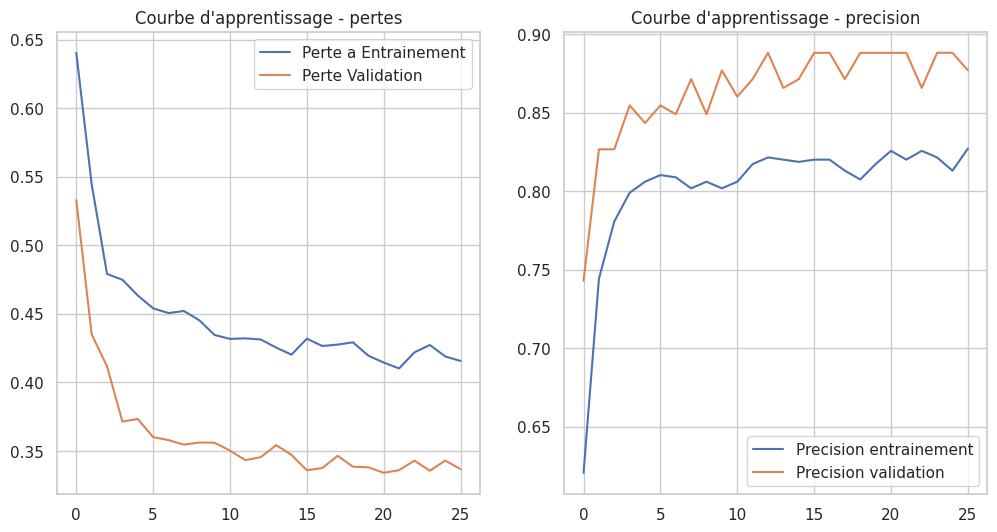

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte a Entrainement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.legend()
plt.title("Courbe d'apprentissage - pertes")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precision entrainement')
plt.plot(history.history['val_accuracy'], label='Precision validation')
plt.legend()
plt.title("Courbe d'apprentissage - precision")
plt.show()


Le modèle apprend bien. Il n'y a pas de signe de surapprentissage (overfitting) visible ici, car la courbe orange ne remonte pas alors que la bleue continue de descendre. le modele performe mieux sur les donnes qu'il connait pas que sur celles qu'il connait ce qui indique qu'il generalise bien



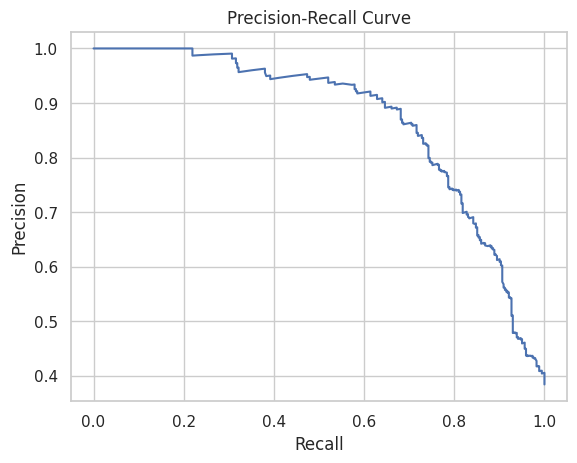

In [ ]:

precision, recall, _ = precision_recall_curve(y, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Le modèle est très précis lorsqu’il est prudent, et il offre un bon équilibre au milieu de la courbe. Lorsqu’on cherche à détecter tous les survivants, la précision diminue.

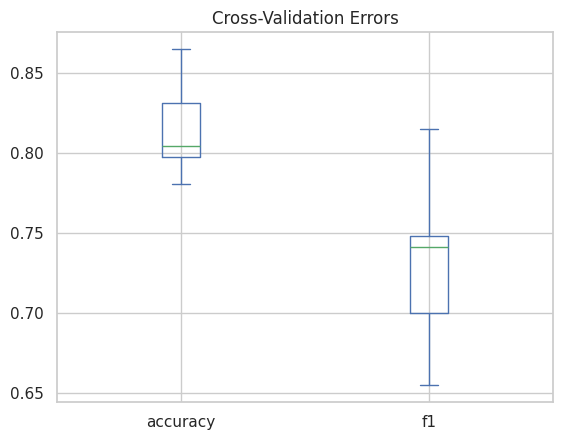

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df[['accuracy', 'f1']].plot(kind='box')
plt.title("Cross-Validation Errors")
plt.show()
